# Setup

In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, Input, Dense,  Reshape, BatchNormalization
from tensorflow.keras.models import Model


In [220]:
import ast
import matplotlib.pyplot as plt



## Load Dataframe

In [172]:
train_df = pd.read_csv("/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/new_train_data.csv")
train_df['id_num'] = train_df['id'].str.extract(r'(^[a-zA-Z0-9]+)')
train_df['input_shape'] = train_df['input_shape'].apply(lambda x: tuple(map(int, x.strip('()').split(','))))

eval_df = pd.read_csv("/Users/neishkasrivastava/Documents/Personal/Kaggle/ARC/arc-prize-2024/new_eval_data.csv")
eval_df['id_num'] = eval_df['id'].str.extract(r'(^[a-zA-Z0-9]+)')

display(train_df.head(30))
display(eval_df)

,id,input,output,input_shape,output_shape,id_num
0,007bbfb7_train_0,"[[0, 7, 7], [7, 7, 7], [0, 7, 7]]","[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, ...","(3, 3)","(9, 9)",007bbfb7
1,007bbfb7_train_1,"[[4, 0, 4], [0, 0, 0], [0, 4, 0]]","[[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, ...","(3, 3)","(9, 9)",007bbfb7
2,007bbfb7_train_2,"[[0, 0, 0], [0, 0, 2], [2, 0, 2]]","[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, ...","(3, 3)","(9, 9)",007bbfb7
3,007bbfb7_train_3,"[[6, 6, 0], [6, 0, 0], [0, 6, 6]]","[[6, 6, 0, 6, 6, 0, 0, 0, 0], [6, 0, 0, 6, 0, ...","(3, 3)","(9, 9)",007bbfb7
4,007bbfb7_train_4,"[[2, 2, 2], [0, 0, 0], [0, 2, 2]]","[[2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, ...","(3, 3)","(9, 9)",007bbfb7
5,007bbfb7_test,"[[7, 0, 7], [7, 0, 7], [7, 7, 0]]","[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, ...","(3, 3)","(9, 9)",007bbfb7
6,00d62c1b_train_0,"[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3...","[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, 3...","(6, 6)","(6, 6)",00d62c1b
7,00d62c1b_train_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, ...","(10, 10)","(10, 10)",00d62c1b
8,00d62c1b_train_2,"[[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, ...","(10, 10)","(10, 10)",00d62c1b
9,00d62c1b_train_3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, ...","(10, 10)","(10, 10)",00d62c1b


,id,input,output,input_shape,output_shape,id_num
0,00576224_train_0,"[[8, 6], [6, 4]]","[[8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4], [6, 8...","(2, 2)","(6, 6)",00576224
1,00576224_train_1,"[[7, 9], [4, 3]]","[[7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3], [9, 7...","(2, 2)","(6, 6)",00576224
2,00576224_test,"[[3, 2], [7, 8]]","[[3, 2, 3, 2, 3, 2], [7, 8, 7, 8, 7, 8], [2, 3...","(2, 2)","(6, 6)",00576224
3,009d5c81_train_0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","(14, 14)","(14, 14)",009d5c81
4,009d5c81_train_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...","(14, 14)","(14, 14)",009d5c81
...,...,...,...,...,...,...
1758,ff72ca3e_train_0,"[[0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 2, 2, ...","(12, 10)","(12, 10)",ff72ca3e
1759,ff72ca3e_train_1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, ...","(9, 10)","(9, 10)",ff72ca3e
1760,ff72ca3e_train_2,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, ...","(9, 8)","(9, 8)",ff72ca3e
1761,ff72ca3e_train_3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, ...","(9, 11)","(9, 11)",ff72ca3e


### Grouping the training set based on tasks

In [202]:
def parse_array(string):
    return np.array(ast.literal_eval(string))

def apply_padding(array, target_shape):
    """
    Pads an array to the target shape with zeros.
    
    Parameters:
    array (np.ndarray): The input array to pad.
    target_shape (tuple): The target shape (rows, columns) to pad the array to.
    
    Returns:
    np.ndarray: The padded array with the target shape.
    """
    current_shape = array.shape
    if current_shape == target_shape:
        return array
    
    pad_height = target_shape[0] - current_shape[0]
    pad_width = target_shape[1] - current_shape[1]
    
    if pad_height < 0 or pad_width < 0:
        raise ValueError("Target shape must be larger than the current shape in both dimensions.")
    
    padding = ((0, pad_height), (0, pad_width))
    padded_array = np.pad(array, padding, mode='constant', constant_values=0)
    
    return padded_array

In [203]:
result_dict = {}

for id_num, group in train_df.groupby('id_num'):
    max_shape = (30, 30)
    
    result_dict[id_num] = {
        'train': [],
        'test': None
    }
    for _, row in group.iterrows():
        input_array = parse_array(row['input'])
        output_array = parse_array(row['output'])
        
        if input_array.shape != max_shape:
            input_array = apply_padding(input_array, max_shape)
        if output_array.shape != max_shape:
            output_array = apply_padding(output_array, max_shape)

        if 'train' in row['id']:
            result_dict[id_num]['train'].append((input_array, output_array))
        elif 'test' in row['id']:
            result_dict[id_num]['test'] = (input_array, output_array)

In [204]:
for task_id, task in result_dict.items():
    print(task_id)
    test_input = result_dict[task_id]['test'][0]
    test_output = result_dict[task_id]['test'][1]
    print(f"Test input shape : {test_input.shape}, Test output shape : {test_output.shape}")
    for i in range(len(result_dict[task_id]['train'])):
        print(f"Test input shape : {result_dict[task_id]['train'][i][0].shape}, Test output shape : {result_dict[task_id]['train'][i][1].shape}")

007bbfb7
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
00d62c1b
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
017c7c7b
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
Test input shape : (30, 30), Test output shape : (30, 30)
025d127b
Test input shape : (30, 30), Test ou

### Defining a regression problem

In [229]:
def create_regression_model(input_shape, output_shape):
    # Example model creation function with L2 regularization and dropout
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(output_shape[0] * output_shape[1]),
        tf.keras.layers.Reshape(output_shape)
    ])
    return model

### Loss function 

In [230]:
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def preprocess_data(x, y):
    x = np.expand_dims(x, axis=0).astype(np.float32)
    y = np.expand_dims(y, axis=0).astype(np.float32)
    return x, y

### MAML arch. 

The MAML algorithm involves two main phases: the inner loop and the outer loop.

**Inner Loop:** Adapt the model parameters to a specific task.
<br>
**Outer Loop:** Update the initial model parameters based on how well the adapted models perform on their respective tasks.

In [231]:
class MAML:
    def __init__(self, inner_lr, outer_lr):
        self.inner_lr = inner_lr
        self.outer_lr = outer_lr
        self.optimizer = None
        self.train_losses = []
        self.test_losses = []

    def adapt(self, model, x, y):
        with tf.GradientTape() as tape:
            preds = model(x, training=True)
            loss = mse_loss(y, preds)
        grads = tape.gradient(loss, model.trainable_variables)
        adapted_vars = [v - self.inner_lr * g for v, g in zip(model.trainable_variables, grads)]
        for var, adapted_var in zip(model.trainable_variables, adapted_vars):
            var.assign(adapted_var)
        return model

    def meta_train_step(self, tasks):
        meta_grads = None
        task_losses = {}
        total_train_loss = 0
        num_train_samples = 0
        
        for task_id, task in tasks.items():
            input_shape = task['train'][0][0].shape
            output_shape = task['train'][0][1].shape
            # print(f"Task: {task_id}, Input shape: {input_shape}, Output shape: {output_shape}")

            model = create_regression_model(input_shape, output_shape)
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.outer_lr)  # Recreate optimizer

            task_train_losses = []
            for x_train, y_train in task['train']:
                x_train, y_train = preprocess_data(x_train, y_train)
                # print(f"Training data shape: {x_train.shape}, {y_train.shape}")
                model = self.adapt(model, x_train, y_train)

                preds_train = model(x_train, training=False)
                train_loss = mse_loss(y_train, preds_train).numpy()
                task_train_losses.append(train_loss)

            avg_task_train_loss = sum(task_train_losses) / len(task_train_losses)
            total_train_loss += avg_task_train_loss * len(task['train'])
            num_train_samples += len(task['train'])

            x_test, y_test = task['test']
            x_test, y_test = preprocess_data(x_test, y_test)
            # print(f"Test data shape: {x_test.shape}, {y_test.shape}")
            
            preds = model(x_test, training=False)
            loss = mse_loss(y_test, preds).numpy()
            task_losses[task_id] = loss

            with tf.GradientTape() as tape:
                preds = model(x_test, training=True)
                loss = mse_loss(y_test, preds)
            grads = tape.gradient(loss, model.trainable_variables)

            if meta_grads is None:
                meta_grads = grads
            else:
                meta_grads = [mg + g for mg, g in zip(meta_grads, grads)]

        avg_train_loss = total_train_loss / num_train_samples
        self.train_losses.append(avg_train_loss)

        self.optimizer.apply_gradients(zip(meta_grads, model.trainable_variables))
        self.test_losses.append(sum(task_losses.values()) / len(task_losses))
        return task_losses

    def train(self, tasks, epochs):
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            task_losses = self.meta_train_step(tasks)
            for task_id, loss in task_losses.items():
                print(f"Task: {task_id}, Loss: {loss:.4f}")

        # Plotting the losses
        plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), self.train_losses, label='Training Loss')
        plt.plot(range(epochs), self.test_losses, label='Testing Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Testing Loss over Epochs')
        plt.legend()
        plt.show()

Epoch 1/20
Task: 007bbfb7, Loss: 2.0196
Task: 00d62c1b, Loss: 1.3980
Task: 017c7c7b, Loss: 0.0690
Task: 025d127b, Loss: 0.3515
Task: 045e512c, Loss: 1.0275
Task: 0520fde7, Loss: 0.0211
Task: 05269061, Loss: 0.3853
Task: 05f2a901, Loss: 0.3378
Task: 06df4c85, Loss: 8.1971
Task: 08ed6ac7, Loss: 0.2334
Task: 09629e4f, Loss: 2.0880
Task: 0962bcdd, Loss: 0.4900
Task: 0a938d79, Loss: 0.7210
Task: 0b148d64, Loss: 0.1124
Task: 0ca9ddb6, Loss: 0.4928
Task: 0d3d703e, Loss: 0.4401
Task: 0dfd9992, Loss: 16.7999
Task: 0e206a2e, Loss: 0.4604
Task: 10fcaaa3, Loss: 2.6903
Task: 11852cab, Loss: 0.0993
Task: 1190e5a7, Loss: 0.6851
Task: 137eaa0f, Loss: 0.4518
Task: 150deff5, Loss: 1.0373
Task: 178fcbfb, Loss: 0.3197
Task: 1a07d186, Loss: 0.7615
Task: 1b2d62fb, Loss: 0.4750
Task: 1b60fb0c, Loss: 0.0789
Task: 1bfc4729, Loss: 1.9623
Task: 1c786137, Loss: 2.2294
Task: 1caeab9d, Loss: 0.1287
Task: 1cf80156, Loss: 0.5045
Task: 1e0a9b12, Loss: 0.1982
Task: 1e32b0e9, Loss: 11.6632
Task: 1f0c79e5, Loss: 1.7354
T

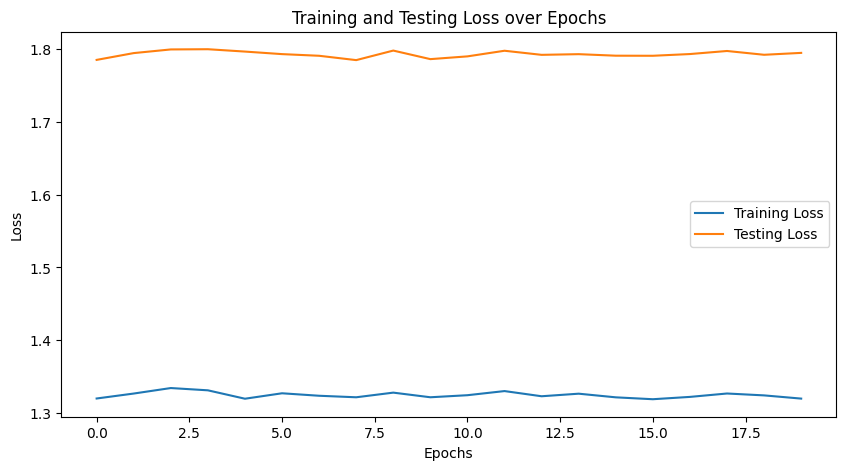

In [234]:
# Create MAML instance
maml = MAML(inner_lr=0.001, outer_lr=0.0001)

# Train the model
maml.train(result_dict, epochs=20)